## Tennis stats 

*Goal:* create a linear regression model to predict the outcome for a tennis player based on their stats. Data from the Association of Tennis Professionals (ATP).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("tennis_stats.csv")

In [2]:
df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

### Exploratory data analysis

Assuming that the dependent variable is "Winnings", the following features seem to be strongly correlated with it, as verified by scatter plots:
- Aces
- BreakPointsFaced
- BreakPointsOpportunities
- DoubleFaults
- ReturnGamesPlayed
- ServiceGamesPlayed

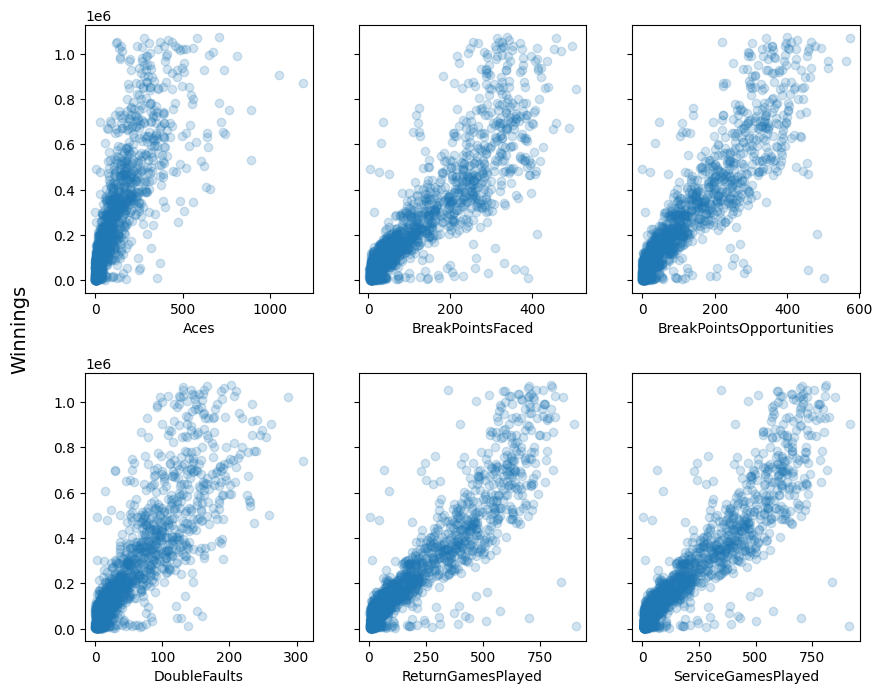

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(10, 8), gridspec_kw={"hspace":0.3})
x_list = [df.Aces, df.BreakPointsFaced, df.BreakPointsOpportunities, df.DoubleFaults, df.ReturnGamesPlayed, df.ServiceGamesPlayed]
idx = 0 
for i in range(2):
  for j in range(3):
    axs[i, j].scatter(x=x_list[idx], y=df.Winnings, alpha=0.2)
    axs[i, j].set_xlabel(x_list[idx].name)
    idx += 1
fig.text(0.05, 0.5, 'Winnings', va='center', rotation='vertical', fontsize=14)
plt.show()

### Simple linear regression models
Testing the possible features, the one which attains a higher coefficient of determination and lowest error is `ReturnGamesPlayed` (which is almost identical to `ServiceGamesPlayed`).  

Results for feature Aces
r²=0.57
SSR=8.82e+12
Results for feature BreakPointsFaced
r²=0.75
SSR=5.14e+12
Results for feature BreakPointsOpportunities
r²=0.81
SSR=3.97e+12
Results for feature DoubleFaults
r²=0.71
SSR=5.85e+12
Results for feature ReturnGamesPlayed
r²=0.83
SSR=3.39e+12
Results for feature ServiceGamesPlayed
r²=0.83
SSR=3.39e+12


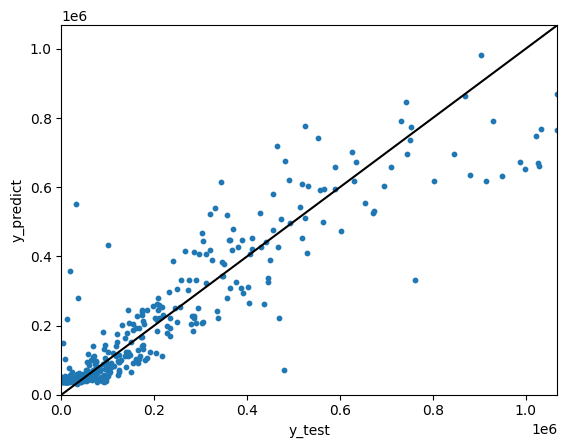

In [4]:
from script import train_model, predict_vs_test

y = df.Winnings
for X in x_list:
  # Split dataset (80% training, 20% test)
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)
  y_predict, r2, ssr = train_model(X_train, X_test, y_train, y_test)
  print(f"Results for feature {X.name}")
  print(f"r²={r2:.2f}")
  print(f"SSR={ssr:.2e}")

# Plot y_test vs y_predict
predict_vs_test(y_predict, y_test)

### Multiple linear regression models
Pairs of features to test with `ReturnGamesPlayed`:
- Aces
- BreakPointsFaced
- BreakPointsOpportunities
- DoubleFaults 

`ServiceGamesPlayed` won't be used because it's almost identical to `ReturnGamesPlayed`

In [5]:
x1 = df.ReturnGamesPlayed
x2_list = [df.Aces, df.BreakPointsFaced, df.BreakPointsOpportunities, df.DoubleFaults]
y = df.Winnings 

for x2 in x2_list: 
  # Features df 
  X = pd.concat([x1, x2], axis=1)
  
  # Split 
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)
  
  # Training 
  y_predict, r2, ssr = train_model(X_train, X_test, y_train, y_test)
  
  # Print results
  print(f"Results for features {x1.name} and {x2.name}")
  print(f"r²={r2:.2f}")
  print(f"SSR={ssr:.2e}")

  

Results for features ReturnGamesPlayed and Aces
r²=0.83
SSR=3.38e+12
Results for features ReturnGamesPlayed and BreakPointsFaced
r²=0.84
SSR=3.31e+12
Results for features ReturnGamesPlayed and BreakPointsOpportunities
r²=0.84
SSR=3.34e+12
Results for features ReturnGamesPlayed and DoubleFaults
r²=0.83
SSR=3.38e+12


The best model with only two features is the one that combines features `ReturnGamesPlayed` and `BreakPointsFaced` to predict `Winnings`, based on the $r^2$ and $SSR$.  

r²=0.84


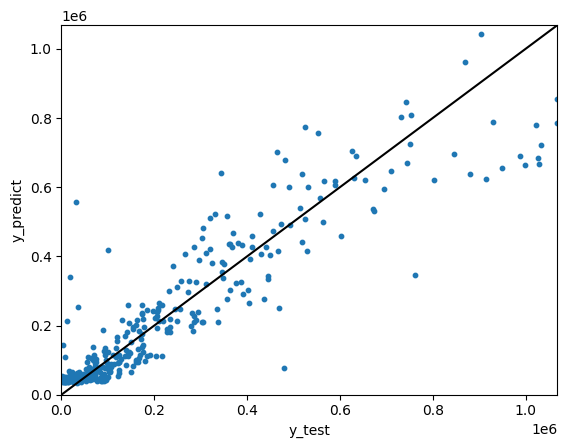

In [7]:
# Plotting the best performing model
X = df[['ReturnGamesPlayed', 'BreakPointsFaced']]
y = df.Winnings 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)

y_predict, r2, ssr = train_model(X_train, X_test, y_train, y_test) 
print(f"r²={r2:.2f}")
predict_vs_test(y_predict, y_test)

### Multiple features
Using all quantitative features that are not associated with winning/losing and rankings. 

Results when 19 features are used:
r²=0.87
SSR=2.63e+12


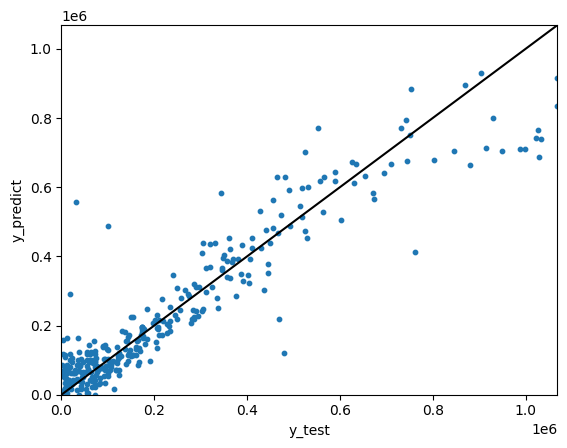

In [19]:
X = df.iloc[:, 1:-4]
y = df.Winnings

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)

y_predict, r2, ssr = train_model(X_train, X_test, y_train, y_test) 
print(f"Results when {len(X.columns)} features are used:")
print(f"r²={r2:.2f}")
print(f"SSR={ssr:.2e}")

predict_vs_test(y_predict, y_test)

It can be seen that in this case increasing model complexity through the addition of more features only serves to increase $r^2$ marginally (from 0.83 with one feature to 0.87 with 19 features), with an approximate drop in total squared error of 20%.